In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/Covid Live.csv', encoding_errors='ignore').drop('#', axis=1)
df.tail(5)

,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
225,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
228,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,"626,161"
229,MS Zaandam,9,2,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#columns names look strange, lets get rid of enters

df = pd.DataFrame(data=df.values, columns=df.columns.str.replace("\n", " "))
df.sample(5)

,"Country, Other",Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
101,Botswana,"326,308","2,789",NaN,"322,955",564,1,"133,669","1,142","2,026,898","830,300","2,441,162"
93,Qatar,"450,448",682,NaN,"443,418","6,348",4,"151,161",229,"3,951,470","1,326,034","2,979,915"
99,Zambia,"333,531","4,017",NaN,"329,375",139,NaN,"17,130",206,"3,731,374","191,645","19,470,234"
190,Monaco,"14,608",63,NaN,"14,478",67,4,"367,192","1,584","78,646","1,976,875","39,783"
68,Ecuador,"1,003,778","35,894",NaN,"964,320","3,564",759,"55,416","1,982","3,082,403","170,173","18,113,361"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country, Other     230 non-null    object
 1   Total Cases        230 non-null    object
 2   Total Deaths       225 non-null    object
 3   New Deaths         3 non-null      object
 4   Total Recovered    214 non-null    object
 5   Active Cases       215 non-null    object
 6   Serious, Critical  147 non-null    object
 7   Tot Cases/ 1M pop  228 non-null    object
 8   Deaths/ 1M pop     223 non-null    object
 9   Total Tests        214 non-null    object
 10  Tests/ 1M pop      214 non-null    object
 11  Population         228 non-null    object
dtypes: object(12)
memory usage: 21.7+ KB


In [5]:
# seems like # of death column needs to be discovered additionally, only 3 values and 3 uniques
df.iloc[:,3].unique()

array([nan, 42.0, 9.0, 3.0], dtype=object)

we see many columns of the dataset were imported as objects. probably because of commas. so we need to process it

In [6]:
#lets get rid of commas and convert dtytes to numbers

for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(',', '').astype('float64')
df

,"Country, Other",Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,USA,98166904.0,1084282.0,NaN,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,India,44587307.0,528629.0,NaN,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,France,35342950.0,155078.0,NaN,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,Brazil,34706757.0,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,Germany,33312373.0,149948.0,NaN,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
225,Niue,80.0,NaN,NaN,80.0,0.0,NaN,49322.0,NaN,NaN,NaN,1.622000e+03
226,Vatican City,29.0,NaN,NaN,29.0,0.0,NaN,36295.0,NaN,NaN,NaN,7.990000e+02
227,Tuvalu,20.0,NaN,NaN,NaN,20.0,NaN,1658.0,NaN,NaN,NaN,1.206600e+04
228,Western Sahara,10.0,1.0,NaN,9.0,0.0,NaN,16.0,2.0,NaN,NaN,6.261610e+05


In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
count,230.00,225.00,3.00,214.00,215.00,147.00,228.00,223.00,214.00,214.00,228.00
mean,2705968.93,29098.20,18.00,2807254.74,57448.95,270.22,179621.85,1197.97,31370107.29,2050888.07,34846200.67
std,8779899.12,102213.73,21.00,8815290.78,207382.25,922.70,182372.51,1246.99,114456090.19,3490517.18,138923313.80
min,9.00,1.00,3.00,2.00,0.00,1.00,16.00,2.00,5117.00,5091.00,799.00
25%,23649.00,202.00,6.00,19683.25,132.00,4.50,16932.50,157.50,346260.25,180740.75,517096.50
50%,203711.00,2179.00,9.00,225011.00,1246.00,18.00,117976.00,777.00,2172044.00,871741.50,5816377.50
75%,1256286.00,14122.00,25.50,1437441.00,19239.50,101.00,293122.75,1953.00,12675849.75,2345814.25,22549277.25
max,98166904.00,1084282.00,42.00,94962112.00,2120510.00,8318.00,703959.00,6429.00,1118158870.00,22004939.00,1448471400.00


C:\Users\Oleh\AppData\Local\Temp\ipykernel_11200\3861144522.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

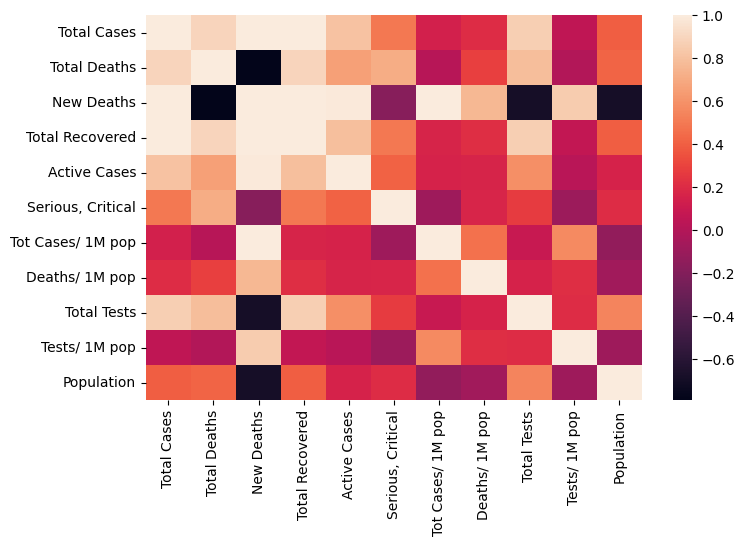

In [8]:
#let's plot a correlation heatmap to see the relations between the features
plt.figure(figsize=(8,5))
sns.heatmap(df.corr())


In [9]:
#lets try to find for how many countries we have the data available

len(df.iloc[:,0].unique())

230

❗ so each row in the dataset is unique country

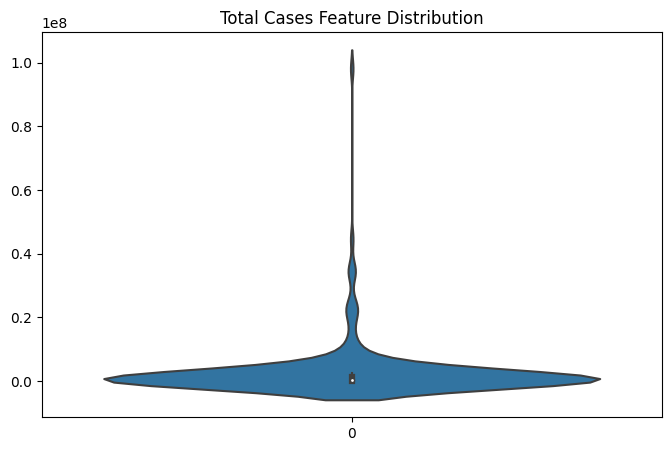

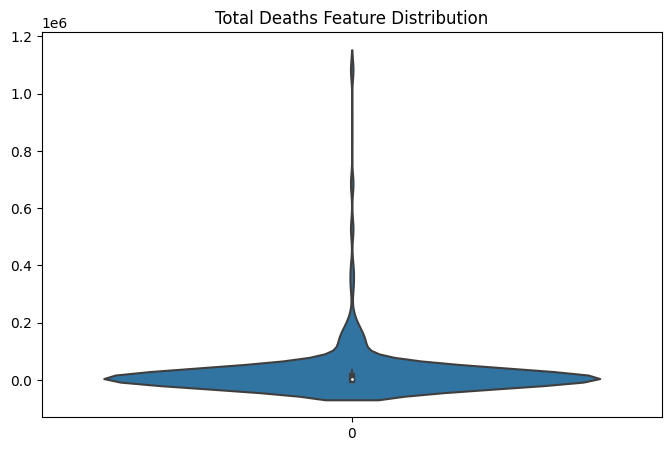

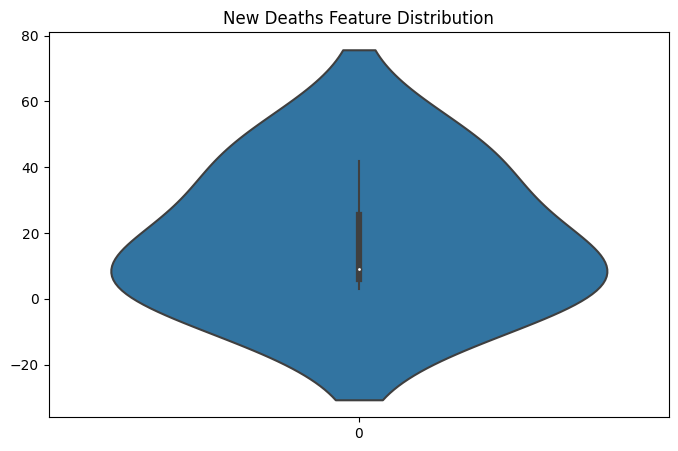

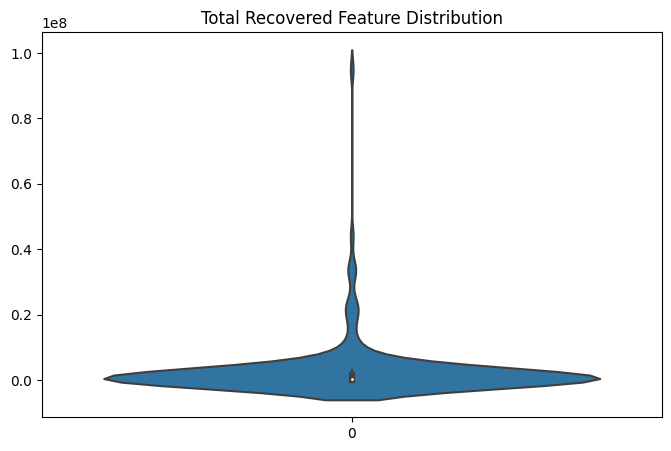

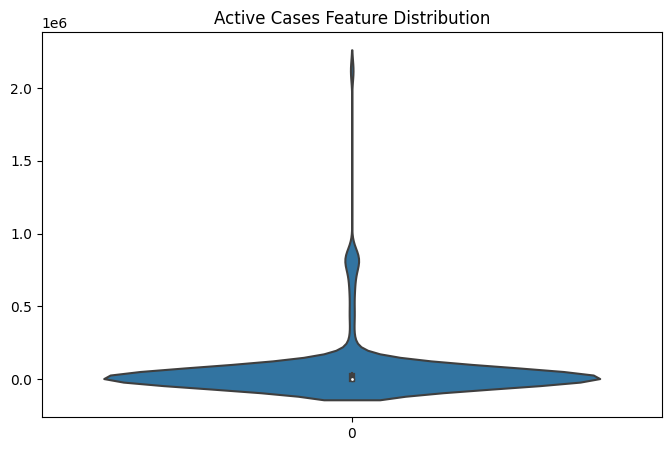

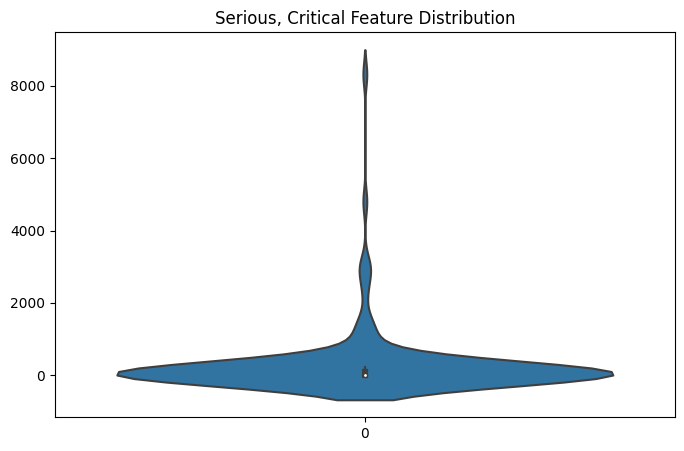

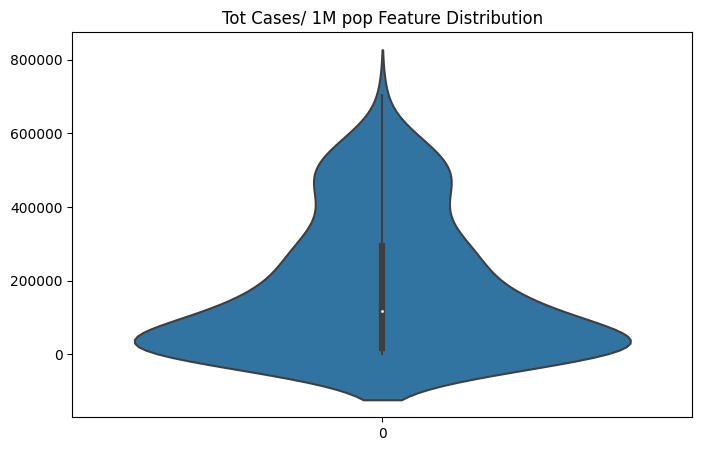

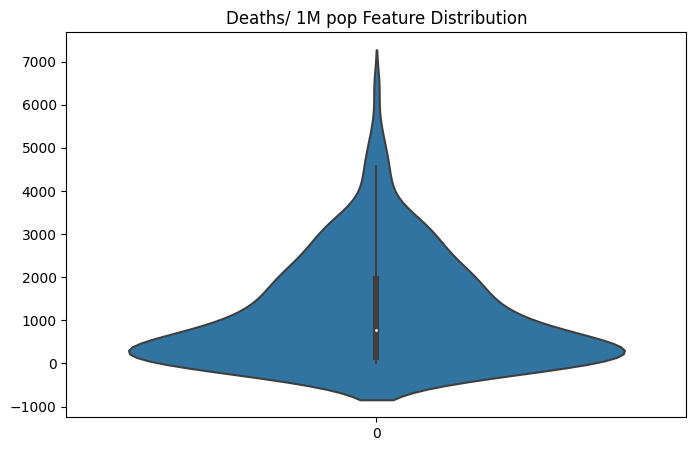

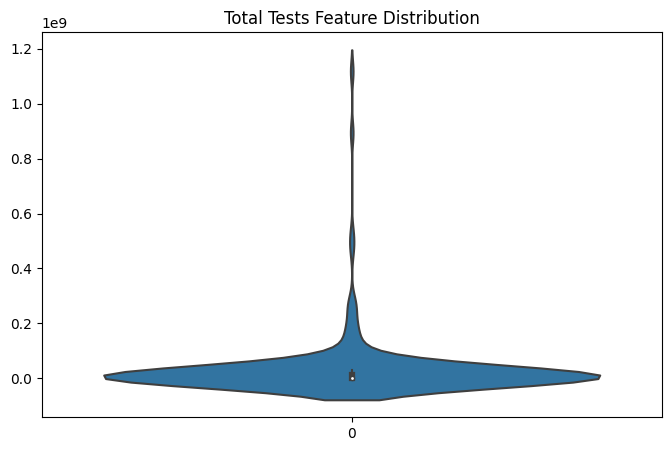

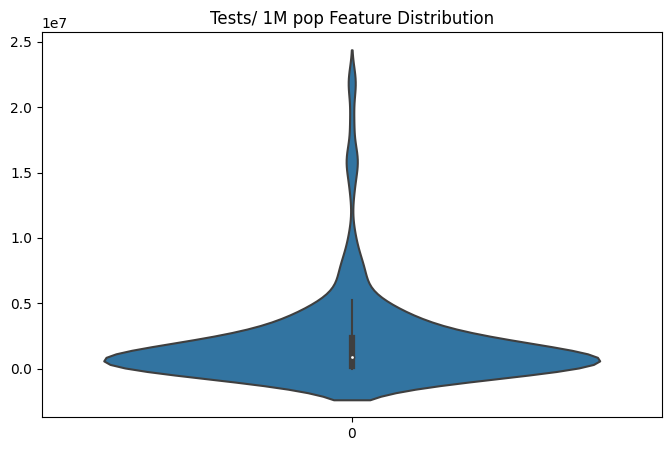

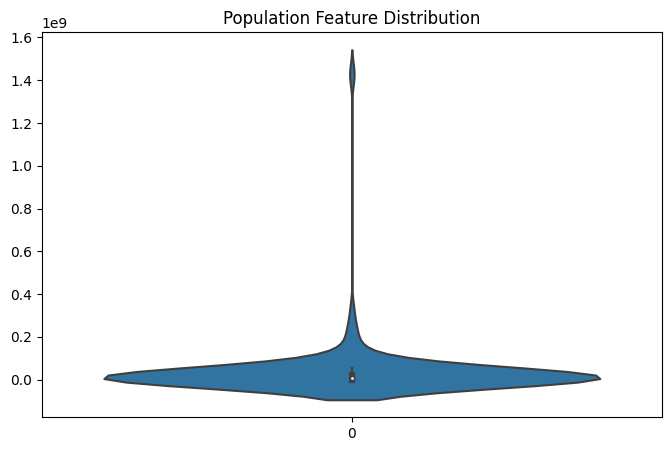

In [10]:
#checking the distribution of the features
for col in df.columns[1:]: #as first one is categorical
    plt.figure(figsize=(8,5))
    plt.title(col+' Feature Distribution')
    sns.violinplot(df[col])

In [11]:
# as we see, New Death column is most likely not used a lot by many countries. Entering % is following
str(round(len(df[~df['New Deaths'].isna()])/len(df)*100,2))+'%'

'1.3%'

Text(0, 0.5, 'Total Cases (hundreds milions)')

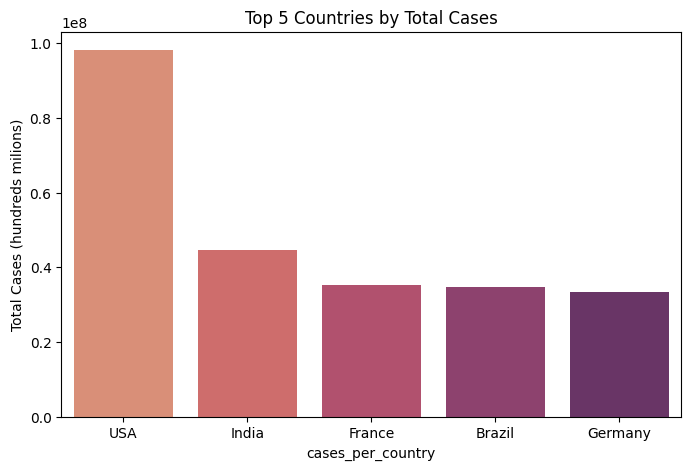

In [12]:
cases_per_country = df.groupby('Country, Other')['Total Cases'].sum().sort_values(ascending=False).reset_index()

# group by not mandatory if see per country in this database
plt.figure(figsize=(8,5))
plt.title('Top 5 Countries by Total Cases')
sns.barplot(x=cases_per_country.iloc[0:5,0], y = cases_per_country.iloc[0:5,1], palette = 'flare')
plt.xlabel('cases_per_country')
plt.ylabel('Total Cases (hundreds milions)')

In [13]:
# load some shape to able to plot the data geographically
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_countries.geojson"
map_shape = gpd.read_file(url)

#and amend country names in the data to link it to the shape 
df = df.replace({'USA': "United States of America", 
"UK": "United Kingdom",
"S. Korea": 'South Korea',
"DPRK": "North Korea",
"Czechia": "Czech Republic",
"Serbia":"Republic of Serbia",
"UAE": "United Arab Emirates",
"Bahamas":"The Bahamas",
"DRC":"Democratic Republic of the Congo",
"Congo":"Republic of Congo",
"Tanzania":"United Republic of Tanzania",
"CAR":"Central African Republic"
})

#and merge them into 1 object

map = gpd.GeoDataFrame(pd.merge(
    left = df,
    right=map_shape,
    how = 'right',
    left_on = 'Country, Other',
    right_on = 'sovereignt',
    suffixes = (',', '_x')
))

Text(0.5, 1.0, 'Total Covid Cases World')

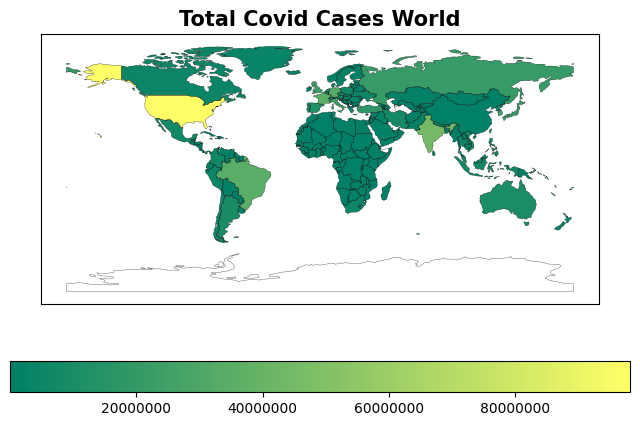

In [14]:

ax=map.boundary.plot(edgecolor='black',linewidth=0.2, figsize=(10,5))
map.plot(ax=ax, column='Total Cases', legend=True, cmap="summer", legend_kwds={'shrink':0.8,'orientation':'horizontal','format':'%.f'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Total Covid Cases World', size=15, weight='bold')